<a href="https://colab.research.google.com/github/akbarmaa/digitalskola_ds11/blob/main/HWData_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW 1 Introduction Visualization**
case : Pinjaman

--------------------------------


by Muhammad Aliakbar
___________________________

**Info Dataset**

Data set ini mencakup data pinjaman pelanggan. Didalamnya berisi peminjam yang telah melunasi pinjamannya, yang telah lewat jatuh tempo dan ditagih tanpa membayar kembali pinjaman dan bunganya, dan yang telah melunasi hanya setelah ditagih. Salah satu dari produk keuangan multifinance adalah pinjaman. Dimana pelanggan harus melunasi semua hutang pinjaman mereka hanya dalam satu waktu pada akhir jangka waktu, bukan jadwal angsuran. Tentu saja, mereka bisa melunasi lebih awal dari jadwal pembayaran mereka.


**Tentang Data**

loan_id Nomor pinjaman unik yang ditetapkan untuk setiap pelanggan pinjaman

Loan_status Apakah pinjaman lunas, in collection, nasabah baru belum lunas, atau lunas setelah upaya penagihan

Pokok pinjaman adalah pokok hutang peminjam

"terms" dapat mingguan (7 hari), dua mingguan, dan jadwal pembayaran bulanan

Tanggal_efektif adalah Saat pinjaman dimulai dan mulai berlaku

Due_date adalah jadwal pembayaran, setiap pinjaman memiliki satu tanggal jatuh tempo

Paidoff_time adalah Waktu aktual pelanggan melunasi pinjaman

Pastdue_days adalah Berapa hari pinjaman telah lewat jatuh tempo

Usia, pendidikan, jenis kelamin Informasi demografis dasar pelanggan

In [ ]:
import pandas as pd
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Loan payments data.csv to Loan payments data.csv


In [ ]:
data = pd.read_csv('Loan payments data.csv')
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [ ]:
data.isna().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [ ]:
data.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


Pengecekan Persebaran frekuensi pinjaman:
- sejumalah (350 orang) peminjam memiliki pinjaman sebesar 1000US

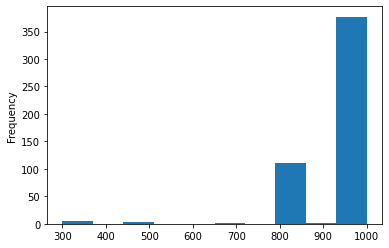

In [ ]:
data['Principal'].plot.hist()

Pengecekan Persebaran Usia Peminjam:
- mayoritas peminjam berusia 25-30th

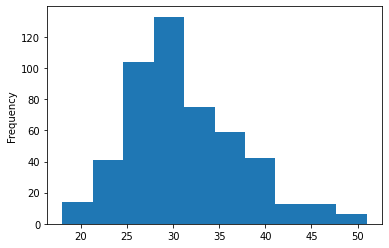

In [ ]:
data['age'].plot.hist()

Pengecekan Persebaran tunggakan peminjam:
- mayoritas peminjam peminjam sudah bayar, namun banyak juga yang menunggak >60 hari

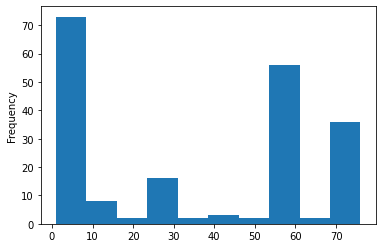

In [ ]:
data['past_due_days'].plot.hist()

Pengecekan Persebaran peminjam:


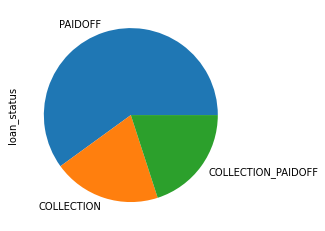

In [ ]:
data['loan_status'].value_counts().plot(kind='pie')



Pengecekan Persebaran Gender peminjam:
mayoritas peminjam adalah laki-laki

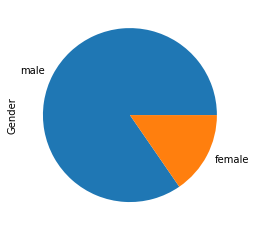

In [ ]:
data['Gender'].value_counts().plot(kind='pie')

Pengecekan Persebaran Gender peminjam dan Total Tunggakan yang dapat ditagih:

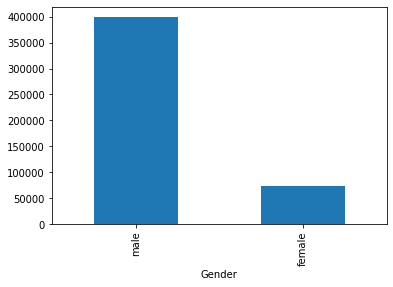

In [ ]:
data.groupby("Gender").Principal.sum().sort_values(ascending=False)[:10].plot.bar()

Pengecekan Persebaran pemilihan angsuran vs total tunggakan:
Makin tinggi angsuran makin besark kemungkinan untuk telat

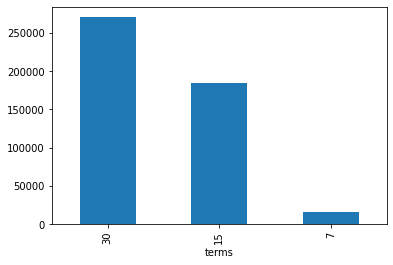

In [ ]:
data.groupby("terms").Principal.sum().sort_values(ascending=False)[:5].plot.bar()

Detail pengecekan Persebaran usia Peminjam:

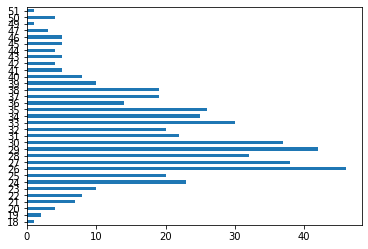

In [ ]:
data['age'].value_counts().sort_index().plot.barh()

Background pendidikan peminjam:
mayoritas adalah mahasiswa dan Pelajar

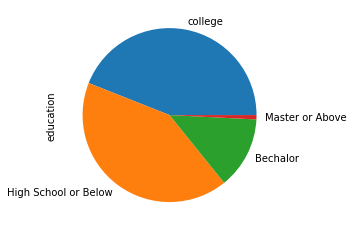

In [ ]:
data['education'].value_counts().plot(kind='pie')

Detail pengecekan kapan waktu paling banyak peminjam yang harus ditagih

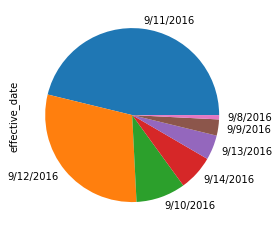

In [ ]:
data['effective_date'].value_counts().plot(kind='pie')

Pengecekan persebaran Hutang

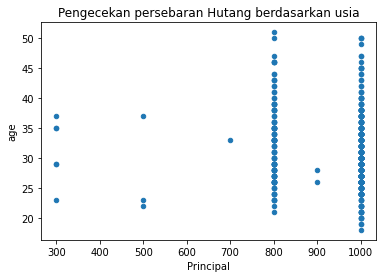

In [ ]:
data.plot.scatter(x='Principal', y='age', title='Pengecekan persebaran Hutang berdasarkan usia')

Detail Pengcekan Background pendidikan peminjam

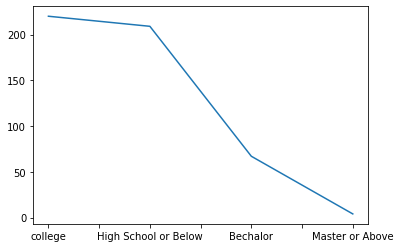

In [ ]:
data['education'].value_counts().plot(kind='line')

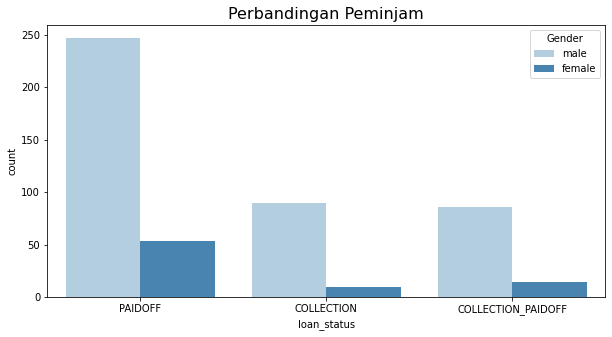

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x = 'loan_status',hue='Gender',palette='Blues')
plt.title("Perbandingan Peminjam",fontsize=16)

plt.show()